<a href="https://colab.research.google.com/github/aletstroz/03MAIR---Algoritmos-de-optimizacion/blob/master/Seminario/Seminario_ALG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  Alexandro López González <br>
Url: https://github.com/aletstroz/03MAIR---Algoritmos-de-optimizacion/tree/master/Seminario<br>
Problema:
> 1. Elección de grupos de población homogéneos

Descripción del problema: 
Una productora ganadera nos encarga la tarea de seleccionar grupos de
terneros para aplicar 3 tratamientos diferentes. Para cada uno de los
tratamientos debemos seleccionar 3 grupos de terneros que sean lo mas
homogéneos posible en peso para que en los resultados del tratamiento influya
lo menos posible el peso del animal. Disponemos de una población de N
animales entre machos y hembras. <br>
Se solicita diseñar un algoritmo para conseguir una agrupación que cumpla de la
mejor manera posible las especificaciones de la productora.<br>
Hemos podido averigua que el peso medio del ternero es 37kg con una
desviación estándar de 2.1




                                        

In [0]:
# Librerias necesarias
import numpy as np
import pandas as pd
import time
from itertools import permutations 
import matplotlib.pyplot as plt

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta:<br>
Se tienen N animales, los cuales se deberán clasificar en 9 grupos (3 grupos para cada uno de los 3 tratamientos). Usando combinatoria se puede decir que:<br>
$C^p_n=\frac{n!}{p!(n-p)!}$ <br>
donde $C$ es el número de combinaciones posibles, $n$ es el número de elementos totales y $p$ es el número de subconjuntos, siempre que $n>p$, entonces dado que se tienen N elementos y 9 grupos: <br>
$C^9_N=\frac{N!}{9!(N-9)!}$ <br>
Si por ejemplo se tienen 90 animales (N=90), las combinaciones posibles son:<br>
$C^{9}_{90}=\frac{90!}{9!(90-9)!}=7.0625\times10^{11}$ <br>

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta:

Se creará un DataFrame donde se etiquetaran los animales con un indice único desde 0 a N. Se adiciona el peso y el sexo de cada animal. Este es creado por la función aleatoria que depende de N y del promedio de peso (m=37 kg) y desviación estandar (s=2.1). Este DataFrame será util, como referencia para la función de aptitud del algoritmo.

El algoritmo usará una matriz para generar cada individuo de una población, conformada por solo los índices del DataFrame de animales.

In [70]:
# Este es el código que crea N animales aleatorios en un DataFrame
# Se basa en una distribución normal o gaussiana para generar animales con s=2.1 y m=37 kg
def Gen_Prob(N):
  s=2.1 
  m=37
  peso = np.random.normal(m,s,N)
  a = np.random.rand(N,1)
  sexo=[]
  for i in a:
    if i>=0.5: # el porcentaje de hembra macho es 50%
      sexo.append('Hembra')
    else:
      sexo.append('Macho')
  df = pd.DataFrame({'Peso':peso,'Sexo':sexo})
# Se truncará al múltiplo más aproximado de 9, esta división cumple 2 propósitos:
# Hacer grupos del mísmo número de animales y si es posible dejar un grupo de 
# control de hasta 8 animales
  Nm=N-(N%9) #Máximo común divisor de 9
  k=int(Nm/9)# se determina cuántos animales tendrá cada grupo experimental
  n = Prob["Peso"].tolist() # se extrae la lista de individuos del data frame
  return df,Nm,k,n

# se crean N animales aleatorios dentro de la distribución
N=int(input("Número de animales:"))
Prob,Nm,k,n=Gen_Prob(N)
print(Prob)
print('Total de elementos a seleccionar:',Nm) # El total de elementos a seleccionar
print('Número de animales por grupo',k)

Número de animales:18
         Peso    Sexo
0   41.494194   Macho
1   39.796208  Hembra
2   35.532521  Hembra
3   34.414105   Macho
4   37.108704   Macho
5   37.482890  Hembra
6   36.744848   Macho
7   36.338404   Macho
8   36.347394  Hembra
9   39.517554   Macho
10  34.772838  Hembra
11  36.183473   Macho
12  35.025513   Macho
13  34.708327   Macho
14  38.673900   Macho
15  36.884185  Hembra
16  34.491333  Hembra
17  38.263189  Hembra
Total de elementos a seleccionar: 18
Número de animales por grupo 2


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta:<br>
La función objetivo será la suma de las desviaciones estandar de los grupos.<br>
Es un problema de minimizar esta suma. Los individuos con elementos más parecidos tendran la suma de la desviación estandar más pequeña.<br>
Ejemplo: <br>
Para un individuo A suponga que los grupos 1 y 2 son [ 1 3 5] y [2 3 4] respectivamente. Las desviaciones estandar son [1.63299316 0.81649658], que sumadas son 2.449489742783178. Para un segundo individuo B los grupos 1 y 2 son [3.1 3 3.2] y [3 3 3], las desviaciones serán [0.08164966 0.0], al sumarse 0.08164965809277268. Entonces el individuo B es superior, lo cual se puede notar lor la uniformidad de los grupos 1 y 2 en comparación con los del individuo B.


In [71]:
def func_apt(mat):
  desv=np.std(mat, axis=1) # desviación estandar de cada set de grupos
  #print(desv)
  apt=np.sum(desv) # suma de la desviación estandar de todos los grupos
  return apt

# se ejecutan los ejemplos anteriores
ej1 = np.array([[1,3,5], [2,3,4]])
apt1=func_apt(ej1)
print(apt1)

ej2 = np.array([[3.1,3,3.2], [3,3,3]])
apt2=func_apt(ej2)
print(apt2)


2.449489742783178
0.08164965809277268


Diseña un algoritmo para resolver el problema por fuerza bruta

## Algoritmo de fuerza bruta

El algoritmo de fuerza bruta se basa en revisar cada permutación de las posibles evaluando la aptitud de cada solución y comparándola con la anterior. Si la función de aptitud de la actual es mejor que las anteriores, se selecciona como la mejor hasta que se reemplace con una mejor, o se termine el problema. <br>

Se debe introducir el número máximo de iteraciones a llevar a cabo. Como se muestra más adelante, para 18 animales seleccionados en 9 grupos de 2, el número máximo de permutaciones es de 6,402,373,705,728,000. Si se desea se puede escribir cualquier número menor a ese para revisar los resultados en un tiempo límite.  <br>

El algoritmo incluye un esquema try catch, por lo que si el usuario desea abortar el algoritmo, de cualquier forma se presentarán resultados hasta la iteración lograda.<br>

Se recomiendan 1,000,000 iteraciones.

In [72]:
def tiempo(time): # para cambiar a horas, minutos y segundos
  time = time % (24 * 3600)
  hour = time // 3600
  time %= 3600
  minutes = time // 60
  time %= 60
  seconds = time
  print("%d:%d:%d" % (hour, minutes, seconds))
  
iter_max=int(input("Número de iteraciones:")) # Número de iteraciones máximas

Número de iteraciones:1000000


Mejor suma de desviación: 3.327280462000079
Los 9 grupos de la solución son:
[[36.57124066 38.01573492]
 [34.38278485 35.42686826]
 [37.24410824 36.41998755]
 [34.84130429 34.10981209]
 [36.37337728 36.32594036]
 [37.9365688  38.54671694]
 [34.28000079 33.69180245]
 [38.64387461 39.11620695]
 [37.77112788 36.87887326]]
Número de mejoras de aptitud: 12
Tiempo transcurrido:
0:0:32


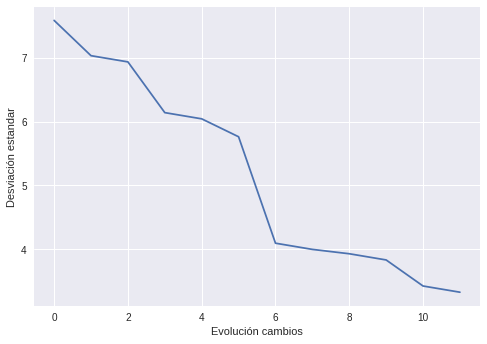

In [73]:
best=100e10 # se propone la mejor varianza con un número eneorme, para proceder a minimizar
cont=0
cont2=0
error=[]
try:
    start_time = time.time()
    for item in permutations(n): # para cada permutación, se evalua la función de aptitud
        #print(cont2) 
        y=func_apt(np.array([item[0:k],item[k:2*k],item[2*k:3*k],item[3*k:4*k],item[4*k:5*k],item[5*k:6*k],item[6*k:7*k],item[7*k:8*k],item[8*k:9*k]]))
        cont2=cont2+1  
        if y < best: # si la evaluación arroja una solución mejor (varianza mínima) se establece como mejor solución
            best=y
            sol=np.array([item[0:k],item[k:2*k],item[2*k:3*k],item[3*k:4*k],item[4*k:5*k],item[5*k:6*k],item[6*k:7*k],item[7*k:8*k],item[8*k:9*k]])
            cont=cont+1 
            error.append(best)
        if cont2 == iter_max:
           break
except:
    print('error')
    
elapsed_time = time.time() - start_time    
print('Mejor suma de desviación:',best)
print('Los 9 grupos de la solución son:')
print(sol)
print('Número de mejoras de aptitud:',cont)
print('Tiempo transcurrido:')
tiempo(elapsed_time)

plt.plot(error)
plt.ylabel('Desviación estandar')
plt.xlabel('Evolución cambios')
plt.show()

Se puede notar en la gráfica que para 1,000,000 iteraciones, realizadas en 32 segundos, se nota una clara tendencia de convergencia, por medio de la disminución de la suma de desviación estandar. El valor mínimo obtenido de desviación estandar es de 3.327280462000079, con 12 mejoras de aptitud.

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta: <br>
Debido a que las permutaciones posibles son $N!$ y el algoritmo recorre cada una realizando el análisis de la función de aptitud, la complejidad del algoritmo es $N!\times m$ donde $m$ es el número de operaciones que se realizan sobre cada permutación. <br>
Aún que el código no está optimizado cualquier número de operaciones $m$ que se hagan sobre el número $N$ de permutaciones es muy elevado. El número mínimo de clasificaciones serían 9 grupos de al menos 2 animales (N=18), de esta forma:


In [74]:
import math

N_ejem=18
print('Número de permutaciones posibles:',math.factorial(N_ejem))
print('Con 2 operaciones se tienen:',2*math.factorial(N_ejem),'operaciones')
print('Con 3 operaciones se tienen:',3*math.factorial(N_ejem),'operaciones')
print('Con 10 operaciones se tienen:',10*math.factorial(N_ejem),'operaciones')

Número de permutaciones posibles: 6402373705728000
Con 2 operaciones se tienen: 12804747411456000 operaciones
Con 3 operaciones se tienen: 19207121117184000 operaciones
Con 10 operaciones se tienen: 64023737057280000 operaciones


## Algoritmo de busqueda aleatoria por lotes

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta:<br>
Un algoritmo que mejora la complejidad es una búsqueda aleatoria por lotes. El proceso será:<br>
1- Generar un lote inicial aleatorio de PobSize elementos<br>
2- Evaluar la función de aptitud para cada elemento de la población PobSize<br>
3- Seleccionar el mejor de los elementos<br>
4- Regresar al punto 1 un numero determinado de iteraciones<br>

Este algoritmo mejora el desempeño de la búsqueda por fuerza bruta debido a que no usa tódo el espacio de permutaciones como espacio de búsqueda, solo toma valores aleatorios y registra cambios cuando existe una mejoría de la solución encontrada.

In [0]:
# Librerias necesarias
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


(*)Calcula la complejidad del algoritmo 

Respuesta: <br>
El algoritmo es tan complejo como el número de operaciones multiplicado por el número de operaciones por el número de elementos en cada lote. Es decir, sea $m$ el número de operaciones que realiza el algoritmo $P$ el número de elementos a seleccionar en cada lote, y  $g$ el número de iteraciones a realizar, enconces la complejidad, $C$ del algoritmo es: $C=m\times P \times g$

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta <br>
La función Gen_Prob(N) genera N animales aleatorios dentro de la distribución normal del problema. Note que se deberán dividir en 9 grupos por lo que si el número no es divisor de 9 se trunca hasta el máximo común divisor (Nm).


In [0]:
# refierase a la función Gen_Prob(N), esta función sirve para ambos algoritmos



Aplica el algoritmo al juego de datos generado

Respuesta <br>
Se elige un número de elementos para cada lote suponga: 1,000 elementos en cada lote <br>
Se elige un número de iteraciones a realizar, suponga: 10,000 iteraciones 

In [76]:
PobSize=int(input("Tamaño del lote:")) # Tamaño de cada lote de soluciones
IteraNum=int(input("Número de iteraciones:")) # Número de iteraciones máximas

Tamaño del lote:1000
Número de iteraciones:10000


In [0]:
# Generador de población aleatoria -------------------------------------------------------------------------------------------------------------------------------
def genRand(PobSize): 
  PobRand=[]
  for i in range(PobSize): # Dado el número de elementos para la población inicial genera esa cantidad de permutaciones aleatorias del vector n (individuos a clasificar)
    x=list(np.random.permutation(n))
    PobRand.append(x)
  return(PobRand)

# Evaluador de aptitud, calcula la desviación estandar de cada set de grupos clasificados--------------------------------------------------------------------------------
def func_apt(mat): 
  desv=np.std(mat, axis=1) # desviación estandar de cada set de grupos
  apt=np.sum(desv) # suma de la desviación estandar de todos los grupos
  return apt

def tiempo(time): # para cambiar a horas, minutos y segundos
  time = time % (24 * 3600)
  hour = time // 3600
  time %= 3600
  minutes = time // 60
  time %= 60
  seconds = time
  print("%d:%d:%d" % (hour, minutes, seconds))


Mejor suma de desviación: 1.46612926078598
Los 9 grupos de la solución son:
[[38.01573492 38.54671694]
 [37.24410824 36.87887326]
 [39.11620695 38.64387461]
 [36.41998755 36.37337728]
 [36.32594036 36.57124066]
 [34.10981209 33.69180245]
 [37.9365688  37.77112788]
 [34.84130429 35.42686826]
 [34.38278485 34.28000079]]
Número de mejoras de aptitud: 15
Tiempo transcurrido:
0:7:18


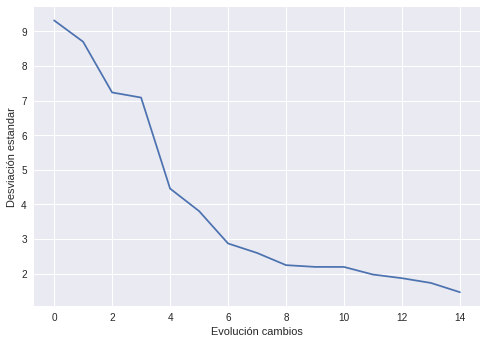

In [78]:
best=100e10 # se propone la mejor varianza con un número enorme, para proceder a minimizar
cont=0
error=[]

start_time = time.time()

for i in range(IteraNum):
  PobRand=genRand(PobSize) # genera una población aleatoria
    
  for item in PobRand: # evalúa cada elemento de la población aleatoria creada
    y=func_apt(np.array([item[0:k],item[k:2*k],item[2*k:3*k],item[3*k:4*k],item[4*k:5*k],item[5*k:6*k],item[6*k:7*k],item[7*k:8*k],item[8*k:9*k]]))
        
    if y < best: # si la evaluación arroja una solución mejor (varianza mínima) se establece como mejor solución
      best=y
      sol=np.array([item[0:k],item[k:2*k],item[2*k:3*k],item[3*k:4*k],item[4*k:5*k],item[5*k:6*k],item[6*k:7*k],item[7*k:8*k],item[8*k:9*k]])
      cont=cont+1
      error.append(best)

# -------------------------------------------------------Resultados--------------------------------------------------------------------------------

elapsed_time = time.time() - start_time    
print('Mejor suma de desviación:',best)
print('Los 9 grupos de la solución son:')
print(sol)
print('Número de mejoras de aptitud:',cont)
print('Tiempo transcurrido:')
tiempo(elapsed_time)

plt.plot(error)
plt.ylabel('Desviación estandar')
plt.xlabel('Evolución cambios')
plt.show()

Los resultados de forma comparativa muestran una gran mejora contra el algoritmo de fuerza bruta. Se realizan 10,000 iteraciones en un tiempo de 7:18 minutos para obtener 15 mejoras de aptitud y una suma de la desviación estandar de 1.46612926078598.<br>
Si se aumenta el número de épocas, o el número de individuos a clasificar en los nueve grupos se notan estas tendecias de forma más marcada.

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta:

## Bibliografía

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html <br>
https://es.wikipedia.org/wiki/Combinatoria <br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html?highlight=shuffle <br>
https://www.geeksforgeeks.org/factorial-in-python/ <br>
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.permutation.html<br>
https://www.w3resource.com/python-exercises/python-basic-exercise-65.php


Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta:

El problema se puede hacer más complejo incluyendo más variables, como por ejemplo el sexo del animal. <br>

Muchos algoritmos podrían mejorar el desempeño de los dos presentados en este documento. Metaheurísticas como los algoritmos genéticos serían una buena opción. 